In [1]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import nltk
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

from scipy.stats import ks_2samp
from IPython.core.display import display, HTML

In [2]:
information = pd.read_csv('question_nf_filename.txt', delimiter='|', encoding='utf-8')
information.columns = ['question_code', 'narrative_form','periodical_name']
information.columns = ['question_code', 'narrative_form','periodical_name']
information

question_code narrative_form  \
0          G01Q02             LB   
1          G01Q03            EX    
2        G01Q04             TR     
3          G01Q05            FP    
4          G01Q06             ??   
..            ...            ...   
268       G00Q266             MT   
269       G00Q267             MT   
270       G00Q268             FP   
271       G00Q269             MT   
272       G00Q270             LB   

                                       periodical_name  
0     1761-07-08_El-Duende-especulativo-sobre-la-vi...  
1     1761-09-05_El-Duende-especulativo-sobre-la-vi...  
2     1761-09-05_El-Duende-especulativo-sobre-la-vi...  
3      1761-09-26_El-Duende-especulativo-sobre-la-v...  
4     1761-07-27_El-Duende-especulativo-sobre-la-vi...  
..                                                 ...  
268  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
269  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
270  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
271  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
272  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-01...  

[273 rows x 3 columns]

In [3]:
emotion_gold_1 = pd.read_csv('surveys/emotion/gold_1.csv', delimiter=',', encoding='utf-8')
emotion_gold_1

question_code emotion_annotation  \
0         G01Q01              anger   
1         G01Q05                joy   
2          G01Q8           surprise   
3         G01Q52            sadness   
4         G01Q10              trust   
..           ...                ...   
58       G00Q126            sadness   
59       G00Q127            sadness   
60       G00Q131                joy   
61       G00Q132                joy   
62       G00Q134            sadness   

                                             sentence  
0   Mi pobre Vecino, posseìdo de una furiosa frene...  
1   Su tierno corazon, su espiritu admirable, su m...  
2   No es chanza: la mayor parte de los hombres no...  
3   Y ha de saber Vm. que por la vanidad de estas ...  
4   La lectura à que yo intento conduciros, solo p...  
..                                                ...  
58  Está capáz de entristecer à la compañia mas al...  
59  Está capáz de entristecer à la compañia mas al...  
60                     Es un Fenix entre los hombres.  
61                     Es un Fenix entre los hombres.  
62  Conociò su yerro, y procurò enmendarlo escribi...  

[63 rows x 3 columns]

In [4]:
pd.set_option('display.max_rows', 500)


In [5]:
polarity_gold_1 = pd.read_csv('surveys/polarity/gold_polarity_1.csv', delimiter=',', encoding='utf-8')
polarity_gold_1

question_code                                           sentence  \
0          G01Q01  Mi pobre Vecino, posseìdo de una furiosa frene...   
1          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
2          G01Q03  Matò à un Joven por haver murmurado de la cond...   
3          G01Q04  Pero no havia pisado sus umbrales, quando la D...   
4          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
5          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
6          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
7          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
8          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
9           G01Q8  No es chanza: la mayor parte de los hombres no...   
10         G01Q52  Y ha de saber Vm. que por la vanidad de estas ...   
11         G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
12          G01Q9  El amor, que todos tenemos à la libertad, impe...   
13         G01Q54  Si el amigo no hallaba este espediente para ap...   
14         G01Q10  La lectura à que yo intento conduciros, solo p...   
15         G01Q55  No nos desviamos de la verdad si comparamos á ...   
16         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
17         G01Q12  Yo soy un hombre, que por lo ordinario gusto d...   
18         G01Q13  Convencerá tal vez nuestro espiritu; pero poco...   
19         G01Q14  Una muger hermosa, y entendida nos convence ca...   
20         G01Q56  Semejantes documentos, apenas se aprenderán en...   
21         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
22         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
23         G01Q16  El ocioso quiere un espectaculo, que le haga s...   
24         G01Q59  A una persona de esta cláse, se le oirá decir ...   
25         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
26         G01Q17  Las quisieron virtuosas, y las tienen virtuosa...   
27         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
28         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
29         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
30         G01Q63  Poco habia yo andado por esta morada, quando v...   
31         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
32         G01Q65                         ¡O miserables traductores!   
33         G01Q19  Y finalmente, que le traba como à hombre, para...   
34         G01Q20  Si estuviese en su lugar, me decia yo á mí mis...   
35         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
36         G01Q21  Su trato á todos embiste, à ninguno hace visit...   
37         G01Q67  Señor Regañon: Como buen amante de la patria n...   
38         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
39         G01Q69  Todavía por nuestra desgracia no se han acabad...   
40         G01Q71     El siguiente nos darà una breve idèa del amor.   
41         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
42         G01Q23  Otra semana sabrèmos los demás articulos de es...   
43         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
44         G01Q25  El cuento es breve; no sé si será compendioso....   
45         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
46         G01Q27  La oferta no era friolera: asi fue llamado à u...   
47         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
48         G00Q52  Nos haria Vmd. tambien un favor, à que deberia...   
49         G00Q53  Semejantes al perro de la fabula, que suelta e...   
50         G00Q54  En una palabra, Señores: lo que antes sería oc...   
51         G00Q55  Reynaba en todos el contento, y el ayre resona...   
52         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
53         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
54         G00Q58      Mi abuelo mataba Moro

In [6]:
gold_1 = pd.merge(polarity_gold_1, emotion_gold_1, on=['question_code','sentence'], how='outer')
gold_1

question_code                                           sentence  \
0          G01Q01  Mi pobre Vecino, posseìdo de una furiosa frene...   
1          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
2          G01Q03  Matò à un Joven por haver murmurado de la cond...   
3          G01Q04  Pero no havia pisado sus umbrales, quando la D...   
4          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
5          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
6          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
7          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
8          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
9           G01Q8  No es chanza: la mayor parte de los hombres no...   
10         G01Q52  Y ha de saber Vm. que por la vanidad de estas ...   
11         G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
12          G01Q9  El amor, que todos tenemos à la libertad, impe...   
13         G01Q54  Si el amigo no hallaba este espediente para ap...   
14         G01Q10  La lectura à que yo intento conduciros, solo p...   
15         G01Q55  No nos desviamos de la verdad si comparamos á ...   
16         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
17         G01Q12  Yo soy un hombre, que por lo ordinario gusto d...   
18         G01Q13  Convencerá tal vez nuestro espiritu; pero poco...   
19         G01Q14  Una muger hermosa, y entendida nos convence ca...   
20         G01Q56  Semejantes documentos, apenas se aprenderán en...   
21         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
22         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
23         G01Q16  El ocioso quiere un espectaculo, que le haga s...   
24         G01Q59  A una persona de esta cláse, se le oirá decir ...   
25         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
26         G01Q17  Las quisieron virtuosas, y las tienen virtuosa...   
27         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
28         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
29         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
30         G01Q63  Poco habia yo andado por esta morada, quando v...   
31         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
32         G01Q65                         ¡O miserables traductores!   
33         G01Q19  Y finalmente, que le traba como à hombre, para...   
34         G01Q20  Si estuviese en su lugar, me decia yo á mí mis...   
35         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
36         G01Q21  Su trato á todos embiste, à ninguno hace visit...   
37         G01Q67  Señor Regañon: Como buen amante de la patria n...   
38         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
39         G01Q69  Todavía por nuestra desgracia no se han acabad...   
40         G01Q71     El siguiente nos darà una breve idèa del amor.   
41         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
42         G01Q23  Otra semana sabrèmos los demás articulos de es...   
43         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
44         G01Q25  El cuento es breve; no sé si será compendioso....   
45         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
46         G01Q27  La oferta no era friolera: asi fue llamado à u...   
47         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
48         G00Q52  Nos haria Vmd. tambien un favor, à que deberia...   
49         G00Q53  Semejantes al perro de la fabula, que suelta e...   
50         G00Q54  En una palabra, Señores: lo que antes sería oc...   
51         G00Q55  Reynaba en todos el contento, y el ayre resona...   
52         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
53         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
54         G00Q58      Mi abuelo mataba Moro

In [7]:
gold_1[['polarity_annotation', 'emotion_annotation']] = gold_1[['polarity_annotation', 'emotion_annotation']].fillna('no_agreement')
gold_1

question_code                                           sentence  \
0          G01Q01  Mi pobre Vecino, posseìdo de una furiosa frene...   
1          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
2          G01Q03  Matò à un Joven por haver murmurado de la cond...   
3          G01Q04  Pero no havia pisado sus umbrales, quando la D...   
4          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
5          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
6          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
7          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
8          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
9           G01Q8  No es chanza: la mayor parte de los hombres no...   
10         G01Q52  Y ha de saber Vm. que por la vanidad de estas ...   
11         G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
12          G01Q9  El amor, que todos tenemos à la libertad, impe...   
13         G01Q54  Si el amigo no hallaba este espediente para ap...   
14         G01Q10  La lectura à que yo intento conduciros, solo p...   
15         G01Q55  No nos desviamos de la verdad si comparamos á ...   
16         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
17         G01Q12  Yo soy un hombre, que por lo ordinario gusto d...   
18         G01Q13  Convencerá tal vez nuestro espiritu; pero poco...   
19         G01Q14  Una muger hermosa, y entendida nos convence ca...   
20         G01Q56  Semejantes documentos, apenas se aprenderán en...   
21         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
22         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
23         G01Q16  El ocioso quiere un espectaculo, que le haga s...   
24         G01Q59  A una persona de esta cláse, se le oirá decir ...   
25         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
26         G01Q17  Las quisieron virtuosas, y las tienen virtuosa...   
27         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
28         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
29         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
30         G01Q63  Poco habia yo andado por esta morada, quando v...   
31         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
32         G01Q65                         ¡O miserables traductores!   
33         G01Q19  Y finalmente, que le traba como à hombre, para...   
34         G01Q20  Si estuviese en su lugar, me decia yo á mí mis...   
35         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
36         G01Q21  Su trato á todos embiste, à ninguno hace visit...   
37         G01Q67  Señor Regañon: Como buen amante de la patria n...   
38         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
39         G01Q69  Todavía por nuestra desgracia no se han acabad...   
40         G01Q71     El siguiente nos darà una breve idèa del amor.   
41         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
42         G01Q23  Otra semana sabrèmos los demás articulos de es...   
43         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
44         G01Q25  El cuento es breve; no sé si será compendioso....   
45         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
46         G01Q27  La oferta no era friolera: asi fue llamado à u...   
47         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
48         G00Q52  Nos haria Vmd. tambien un favor, à que deberia...   
49         G00Q53  Semejantes al perro de la fabula, que suelta e...   
50         G00Q54  En una palabra, Señores: lo que antes sería oc...   
51         G00Q55  Reynaba en todos el contento, y el ayre resona...   
52         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
53         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
54         G00Q58      Mi abuelo mataba Moro

In [8]:
polarity_gold_2 = pd.read_csv('surveys/polarity/gold_polarity_2.csv', delimiter=',', encoding='utf-8')
polarity_gold_2

question_code                                           sentence  \
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...   
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...   
2         G00Q138  No es tan facil determinar por dónde se ha de ...   
3         G00Q139  Tù debes acordarte de la ternura, con que se p...   
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...   
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...   
6         G00Q142  Algunas veces me contento con arquear las ceja...   
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...   
8         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...   
9         G00Q147                         ¿no hay Dios que castigue?   
10        G00Q149  Ahora bien, yo no pretendo llevar las cosas al...   
11        G00Q150  Que vivan contentos, y felices todos los hombr...   
12        G00Q151  Si hablo mucho, si con todos me rio, si me bur...   
13        G00Q153  Añada Vm. à esto, que tenia una porcion de def...   
14        G00Q154  Yo sè que su caracter es de amar, y desear lo ...   
15        G00Q155  Amigo mio, es defecto de historia pensar de es...   
16        G00Q161  Grande es este golpe, no lo niego; pero mayor ...   
17        G00Q162  Tan flaca, y consumida, que parecía retrato de...   
18        G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...   
19        G00Q164  Ni tantos ancianos, que en la mas estrecha ang...   
20        G00Q165  Pero será dichoso, y feliz en su estado: no po...   
21        G00Q166  No està en esto la gracia, sino es que apenas ...   
22        G00Q167  Qué contento me hallaba, no obstante mi fatali...   
23        G00Q168  porque yo, quando escribo una carta, à excepsi...   
24        G00Q171  ¡valgate Dios por nombre, que aún assi engendr...   
25        G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...   
26        G00Q173  Todo esto llevará con paciencia, si su asèo, y...   
27        G00Q174  Lucio es un ingrato, es un Hombre, que entrega...   
28        G00Q176  Tenía muchissima confianza de mi, como que se ...   
29        G00Q177  En pocas partes del Mundo se vè con mas freque...   
30        G00Q179  Estas fingidas esperanzas, y las importunas po...   
31        G00Q180  Si esto intentàra, sería un disparate: lo que ...   
32        G00Q181  En pocas partes del Mundo se vè con mas freque...   
33        G00Q201  Examinense las Historias de los Egypcios, y de...   
34        G00Q183  En fin Vm. no estrañe el modo de explicarme, p...   
35        G00Q184  Señora Culta, su Carta es un farrago de los ma...   
36        G00Q185  Yo por mi desgracia me hallo Casada con un Cur...   
37        G00Q203  Llega á tanto nuestra estoildéz, que pasa los ...   
38        G00Q204  ¿Què mayor locura, que sin embargo de ser yo u...   
39        G00Q182  Todas las Señoras estabamos muy contentas con ...   
40        G00Q205  Se le presentaba siempre lleno el semblante de...   
41        G00Q187  Pero vease â uno de estos tenidos por infelice...   
42        G00Q206  Y estos mismos amigos le miran con indiferenci...   
43        G00Q186  Se vè sujeto â las trayciones, expuesto â los ...   
44        G00Q188  De esta continuacion de aplausos ha venido â h...   
45        G00Q207  Esta sábia República tenia establecida la pena...   
46        G00Q189  Mil veces quise matarme, pero mi desgracia qui...   
47        G00Q210  pero un accidente peor para mí que una buena e...   
48        G00Q212  Sabe valerse, perdida enteramente la verguenza...   
49        G00Q213  Pues, Amigo, sepa Vm. que todo se lo llevó el ...   
50        G00Q214  Si tal vez sus expresiones son un poco atrevid...   
51        G00Q191  Tal qual diamantillo tiene; pero lo demás son ...   
52        G00Q215  A mí me hizo reir este ofrecimiento, mas no as...   
53        G00Q192  La epidemia, Señor, ha cundido tanto, que el i...   
54        G00Q216  Es un cobarde, un vil, un

In [9]:
gold = polarity_gold_2.append(gold_1)
gold

C:\Users\krusic\AppData\Local\Temp\ipykernel_16980\4011574393.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gold = polarity_gold_2.append(gold_1)


question_code                                           sentence  \
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...   
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...   
2         G00Q138  No es tan facil determinar por dónde se ha de ...   
3         G00Q139  Tù debes acordarte de la ternura, con que se p...   
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...   
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...   
6         G00Q142  Algunas veces me contento con arquear las ceja...   
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...   
8         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...   
9         G00Q147                         ¿no hay Dios que castigue?   
10        G00Q149  Ahora bien, yo no pretendo llevar las cosas al...   
11        G00Q150  Que vivan contentos, y felices todos los hombr...   
12        G00Q151  Si hablo mucho, si con todos me rio, si me bur...   
13        G00Q153  Añada Vm. à esto, que tenia una porcion de def...   
14        G00Q154  Yo sè que su caracter es de amar, y desear lo ...   
15        G00Q155  Amigo mio, es defecto de historia pensar de es...   
16        G00Q161  Grande es este golpe, no lo niego; pero mayor ...   
17        G00Q162  Tan flaca, y consumida, que parecía retrato de...   
18        G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...   
19        G00Q164  Ni tantos ancianos, que en la mas estrecha ang...   
20        G00Q165  Pero será dichoso, y feliz en su estado: no po...   
21        G00Q166  No està en esto la gracia, sino es que apenas ...   
22        G00Q167  Qué contento me hallaba, no obstante mi fatali...   
23        G00Q168  porque yo, quando escribo una carta, à excepsi...   
24        G00Q171  ¡valgate Dios por nombre, que aún assi engendr...   
25        G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...   
26        G00Q173  Todo esto llevará con paciencia, si su asèo, y...   
27        G00Q174  Lucio es un ingrato, es un Hombre, que entrega...   
28        G00Q176  Tenía muchissima confianza de mi, como que se ...   
29        G00Q177  En pocas partes del Mundo se vè con mas freque...   
30        G00Q179  Estas fingidas esperanzas, y las importunas po...   
31        G00Q180  Si esto intentàra, sería un disparate: lo que ...   
32        G00Q181  En pocas partes del Mundo se vè con mas freque...   
33        G00Q201  Examinense las Historias de los Egypcios, y de...   
34        G00Q183  En fin Vm. no estrañe el modo de explicarme, p...   
35        G00Q184  Señora Culta, su Carta es un farrago de los ma...   
36        G00Q185  Yo por mi desgracia me hallo Casada con un Cur...   
37        G00Q203  Llega á tanto nuestra estoildéz, que pasa los ...   
38        G00Q204  ¿Què mayor locura, que sin embargo de ser yo u...   
39        G00Q182  Todas las Señoras estabamos muy contentas con ...   
40        G00Q205  Se le presentaba siempre lleno el semblante de...   
41        G00Q187  Pero vease â uno de estos tenidos por infelice...   
42        G00Q206  Y estos mismos amigos le miran con indiferenci...   
43        G00Q186  Se vè sujeto â las trayciones, expuesto â los ...   
44        G00Q188  De esta continuacion de aplausos ha venido â h...   
45        G00Q207  Esta sábia República tenia establecida la pena...   
46        G00Q189  Mil veces quise matarme, pero mi desgracia qui...   
47        G00Q210  pero un accidente peor para mí que una buena e...   
48        G00Q212  Sabe valerse, perdida enteramente la verguenza...   
49        G00Q213  Pues, Amigo, sepa Vm. que todo se lo llevó el ...   
50        G00Q214  Si tal vez sus expresiones son un poco atrevid...   
51        G00Q191  Tal qual diamantillo tiene; pero lo demás son ...   
52        G00Q215  A mí me hizo reir este ofrecimiento, mas no as...   
53        G00Q192  La epidemia, Señor, ha cundido tanto, que el i...   
54        G00Q216  Es un cobarde, un vil, un

In [10]:
gold[ 'emotion_annotation'] = gold['emotion_annotation'].fillna('no_agreement')
gold

question_code                                           sentence  \
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...   
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...   
2         G00Q138  No es tan facil determinar por dónde se ha de ...   
3         G00Q139  Tù debes acordarte de la ternura, con que se p...   
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...   
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...   
6         G00Q142  Algunas veces me contento con arquear las ceja...   
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...   
8         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...   
9         G00Q147                         ¿no hay Dios que castigue?   
10        G00Q149  Ahora bien, yo no pretendo llevar las cosas al...   
11        G00Q150  Que vivan contentos, y felices todos los hombr...   
12        G00Q151  Si hablo mucho, si con todos me rio, si me bur...   
13        G00Q153  Añada Vm. à esto, que tenia una porcion de def...   
14        G00Q154  Yo sè que su caracter es de amar, y desear lo ...   
15        G00Q155  Amigo mio, es defecto de historia pensar de es...   
16        G00Q161  Grande es este golpe, no lo niego; pero mayor ...   
17        G00Q162  Tan flaca, y consumida, que parecía retrato de...   
18        G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...   
19        G00Q164  Ni tantos ancianos, que en la mas estrecha ang...   
20        G00Q165  Pero será dichoso, y feliz en su estado: no po...   
21        G00Q166  No està en esto la gracia, sino es que apenas ...   
22        G00Q167  Qué contento me hallaba, no obstante mi fatali...   
23        G00Q168  porque yo, quando escribo una carta, à excepsi...   
24        G00Q171  ¡valgate Dios por nombre, que aún assi engendr...   
25        G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...   
26        G00Q173  Todo esto llevará con paciencia, si su asèo, y...   
27        G00Q174  Lucio es un ingrato, es un Hombre, que entrega...   
28        G00Q176  Tenía muchissima confianza de mi, como que se ...   
29        G00Q177  En pocas partes del Mundo se vè con mas freque...   
30        G00Q179  Estas fingidas esperanzas, y las importunas po...   
31        G00Q180  Si esto intentàra, sería un disparate: lo que ...   
32        G00Q181  En pocas partes del Mundo se vè con mas freque...   
33        G00Q201  Examinense las Historias de los Egypcios, y de...   
34        G00Q183  En fin Vm. no estrañe el modo de explicarme, p...   
35        G00Q184  Señora Culta, su Carta es un farrago de los ma...   
36        G00Q185  Yo por mi desgracia me hallo Casada con un Cur...   
37        G00Q203  Llega á tanto nuestra estoildéz, que pasa los ...   
38        G00Q204  ¿Què mayor locura, que sin embargo de ser yo u...   
39        G00Q182  Todas las Señoras estabamos muy contentas con ...   
40        G00Q205  Se le presentaba siempre lleno el semblante de...   
41        G00Q187  Pero vease â uno de estos tenidos por infelice...   
42        G00Q206  Y estos mismos amigos le miran con indiferenci...   
43        G00Q186  Se vè sujeto â las trayciones, expuesto â los ...   
44        G00Q188  De esta continuacion de aplausos ha venido â h...   
45        G00Q207  Esta sábia República tenia establecida la pena...   
46        G00Q189  Mil veces quise matarme, pero mi desgracia qui...   
47        G00Q210  pero un accidente peor para mí que una buena e...   
48        G00Q212  Sabe valerse, perdida enteramente la verguenza...   
49        G00Q213  Pues, Amigo, sepa Vm. que todo se lo llevó el ...   
50        G00Q214  Si tal vez sus expresiones son un poco atrevid...   
51        G00Q191  Tal qual diamantillo tiene; pero lo demás son ...   
52        G00Q215  A mí me hizo reir este ofrecimiento, mas no as...   
53        G00Q192  La epidemia, Señor, ha cundido tanto, que el i...   
54        G00Q216  Es un cobarde, un vil, un

In [11]:
information['question_code'] = information['question_code'].str.strip()
information['narrative_form'] = information['narrative_form'].str.strip()


In [12]:
df = pd.merge(gold, information, on='question_code', how='inner')
df

question_code                                           sentence  \
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...   
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...   
2         G00Q138  No es tan facil determinar por dónde se ha de ...   
3         G00Q139  Tù debes acordarte de la ternura, con que se p...   
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...   
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...   
6         G00Q142  Algunas veces me contento con arquear las ceja...   
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...   
8         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...   
9         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...   
10        G00Q147                         ¿no hay Dios que castigue?   
11        G00Q149  Ahora bien, yo no pretendo llevar las cosas al...   
12        G00Q150  Que vivan contentos, y felices todos los hombr...   
13        G00Q151  Si hablo mucho, si con todos me rio, si me bur...   
14        G00Q153  Añada Vm. à esto, que tenia una porcion de def...   
15        G00Q154  Yo sè que su caracter es de amar, y desear lo ...   
16        G00Q155  Amigo mio, es defecto de historia pensar de es...   
17        G00Q161  Grande es este golpe, no lo niego; pero mayor ...   
18        G00Q162  Tan flaca, y consumida, que parecía retrato de...   
19        G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...   
20        G00Q164  Ni tantos ancianos, que en la mas estrecha ang...   
21        G00Q165  Pero será dichoso, y feliz en su estado: no po...   
22        G00Q166  No està en esto la gracia, sino es que apenas ...   
23        G00Q167  Qué contento me hallaba, no obstante mi fatali...   
24        G00Q168  porque yo, quando escribo una carta, à excepsi...   
25        G00Q171  ¡valgate Dios por nombre, que aún assi engendr...   
26        G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...   
27        G00Q173  Todo esto llevará con paciencia, si su asèo, y...   
28        G00Q174  Lucio es un ingrato, es un Hombre, que entrega...   
29        G00Q176  Tenía muchissima confianza de mi, como que se ...   
30        G00Q177  En pocas partes del Mundo se vè con mas freque...   
31        G00Q179  Estas fingidas esperanzas, y las importunas po...   
32        G00Q180  Si esto intentàra, sería un disparate: lo que ...   
33        G00Q181  En pocas partes del Mundo se vè con mas freque...   
34        G00Q201  Examinense las Historias de los Egypcios, y de...   
35        G00Q183  En fin Vm. no estrañe el modo de explicarme, p...   
36        G00Q184  Señora Culta, su Carta es un farrago de los ma...   
37        G00Q185  Yo por mi desgracia me hallo Casada con un Cur...   
38        G00Q203  Llega á tanto nuestra estoildéz, que pasa los ...   
39        G00Q204  ¿Què mayor locura, que sin embargo de ser yo u...   
40        G00Q182  Todas las Señoras estabamos muy contentas con ...   
41        G00Q205  Se le presentaba siempre lleno el semblante de...   
42        G00Q187  Pero vease â uno de estos tenidos por infelice...   
43        G00Q206  Y estos mismos amigos le miran con indiferenci...   
44        G00Q186  Se vè sujeto â las trayciones, expuesto â los ...   
45        G00Q188  De esta continuacion de aplausos ha venido â h...   
46        G00Q207  Esta sábia República tenia establecida la pena...   
47        G00Q189  Mil veces quise matarme, pero mi desgracia qui...   
48        G00Q210  pero un accidente peor para mí que una buena e...   
49        G00Q212  Sabe valerse, perdida enteramente la verguenza...   
50        G00Q213  Pues, Amigo, sepa Vm. que todo se lo llevó el ...   
51        G00Q214  Si tal vez sus expresiones son un poco atrevid...   
52        G00Q191  Tal qual diamantillo tiene; pero lo demás son ...   
53        G00Q215  A mí me hizo reir este ofrecimiento, mas no as...   
54        G00Q192  La epidemia, Señor, ha cu

In [13]:
e_no_agreement = df['emotion_annotation'].value_counts().get('no_agreement', 0)
p_no_agreement = df['polarity_annotation'].value_counts().get('no_agreement', 0)

print(f'Polarity:{p_no_agreement}, emotion:{e_no_agreement}')

Polarity:11, emotion:178


# Pysentimiento (sentiment)

In [14]:
!pip install pysentimiento

In [44]:
from pysentimiento import create_analyzer

In [45]:
analyzer = create_analyzer (task='sentiment', lang='es')

In [46]:
df['sentiment_pysentimiento'] = analyzer.predict(df['sentence'])


Map:   0%|          | 0/239 [00:00<?, ? examples/s]

In [47]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score                            sentiment_pysentimiento
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.804,...
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.672,...
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000  

In [48]:
df["sentence"]=df["sentence"].apply(str) 

# Pysentimiento (emotion)


In [49]:
emotion_analyzer = create_analyzer(task="emotion", lang="es")

In [50]:
df['emotion_pysentimiento'] = emotion_analyzer.predict(df['sentence'])


Map:   0%|          | 0/239 [00:00<?, ? examples/s]

In [51]:
df


question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score                            sentiment_pysentimiento
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.804,...
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.672,...
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000  

In [53]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sentiment lexicon

In [54]:
language = "spanish"

dictionary_dir = "dictionaries/manual/"
dictionaryCorr = "dictionaries/computational_corrected/"
dictionaryComp = "dictionaries/computational/"

MAnual

In [55]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 798 negative words
loaded 681 positive words


In [56]:
def compute_sentiment(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_negative = 0
    num_positive = 0
    for nw in sentiment_dict["neg"]:
        num_negative += tokens.count(nw.lower())
    for pw in sentiment_dict["pos"]:
        num_positive += tokens.count(pw.lower())
    try:
        sentiment_score = (num_positive - num_negative) / (num_positive + num_negative)
    except ZeroDivisionError:
        sentiment_score = 0
    return sentiment_score

In [57]:
df["nf_sentiment_lexicon_dispecs"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

Computational

In [58]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 691 negative words
loaded 1034 positive words


In [59]:
df["nf_sentiment_lexicon_computational"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

Corrected dictionary

In [60]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 812 negative words
loaded 692 positive words


In [61]:
df["nf_sentiment_lexicon_corrected"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

# Emotion lexicon

In [62]:
new_dictionary_dir = "dictionaries/emotion/"

emotion_dict = {}
with open(new_dictionary_dir + "anger.txt", "r", encoding="utf-8") as em:
    emotion_dict["anger"] = em.read().splitlines()
with open(new_dictionary_dir + "disgust.txt", "r", encoding="utf-8") as em:
    emotion_dict["disgust"] = em.read().splitlines()
with open(new_dictionary_dir + "joy.txt", "r", encoding="utf-8") as em:
    emotion_dict["joy"] = em.read().splitlines()
with open(new_dictionary_dir + "fear.txt", "r", encoding="utf-8") as em:
    emotion_dict["fear"] = em.read().splitlines()
with open(new_dictionary_dir + "sadness.txt", "r", encoding="utf-8") as em:
    emotion_dict["sadness"] = em.read().splitlines()
with open(new_dictionary_dir +"surprise.txt", "r", encoding="utf-8") as em:
    emotion_dict["surprise"] = em.read().splitlines()
    

print("loaded {} anger words".format(len(emotion_dict["anger"])))
print("loaded {} disgust words".format(len(emotion_dict["disgust"])))
print("loaded {} joy words".format(len(emotion_dict["joy"])))
print("loaded {} fear words".format(len(emotion_dict["fear"])))
print("loaded {} sadness words".format(len(emotion_dict["sadness"])))
print("loaded {} surprise words".format(len(emotion_dict["surprise"])))

loaded 382 anger words
loaded 209 disgust words
loaded 668 joy words
loaded 211 fear words
loaded 391 sadness words
loaded 175 surprise words


In [63]:
def one_emotion(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_anger = 0
    num_disgust = 0
    num_joy = 0
    num_fear = 0
    num_sadness = 0
    num_surprise = 0
    for anger in emotion_dict["anger"]:
        num_anger += tokens.count(anger.lower())
    for disgust in emotion_dict["disgust"]:
        num_disgust += tokens.count(disgust.lower())
    for joy in emotion_dict["joy"]:
        num_joy += tokens.count(joy.lower())
    for fear in emotion_dict["fear"]:
        num_fear += tokens.count(fear.lower())
    for sadness in emotion_dict["sadness"]:
        num_sadness += tokens.count(sadness.lower())
    for surprise in emotion_dict["surprise"]:
        num_surprise += tokens.count(surprise.lower())
    try:
        emotion_score = {'anger' : num_anger,'joy' : num_joy,'disgust' : num_disgust,'fear': num_fear, 'sadness': num_sadness, 'surprise':num_surprise}
        emotion = max(emotion_score, key=emotion_score.get)

    except:
        print("Something went wrong")
    if all(value == 0 for value in emotion_score.values()):
        return ("others")
    else:
        return emotion

In [64]:
df["lexicon_emotion"] = df["sentence"].progress_apply(one_emotion)

  0%|          | 0/239 [00:00<?, ?it/s]

In [65]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score                            sentiment_pysentimiento
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.804,...
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.672,...
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000  

# Making nicer columns (please make sure how to run) - change column_name

In [66]:
def change_values(row):
        if row == 0.000000 :    
            return 'NEU'
        elif row > 0.000000:  
            return 'POS'
        elif row < 0.000000:  
            return 'NEG'
        else:          
            return 'error'

In [67]:
df['manual_lexicon_sent_score'] = df['nf_sentiment_lexicon_dispecs'].apply(change_values)


In [68]:
df['comp_lexicon_sent_score'] = df['nf_sentiment_lexicon_computational'].apply(change_values)

In [69]:
df['corr_lexicon_sent_score'] = df['nf_sentiment_lexicon_corrected'].apply(change_values)

In [70]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score                            sentiment_pysentimiento
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.804,...
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.672,...
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000  

In [71]:
df['sentiment_pysentimiento'] = df['sentiment_pysentimiento'].astype('string')
df['emotion_pysentimiento'] = df['emotion_pysentimiento'].astype('string')


In [72]:
def extract_output(value):
    start_idx = value.find("output=") + len("output=")
    end_idx = value.find(", probas")
    return value[start_idx:end_idx]

In [73]:
df['sentiment_py'] = df['sentiment_pysentimiento'].apply(extract_output)
df['emotion_py'] = df['emotion_pysentimiento'].apply(extract_output)


In [74]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score                            sentiment_pysentimiento sentiment_py emotion_py
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...          NEG      anger
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...          NEG      anger
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...          NEG     others
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.804,...          POS        joy
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.672,...          POS     others
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...          NEG    sadness
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...          NEU        joy
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_ag

In [75]:
len(df)

239

In [76]:
df.to_pickle('sentences_sentiment_emotion.pk')


In [77]:
df = df.drop_duplicates()


In [78]:
len(df)

238

In [79]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score                            sentiment_pysentimiento sentiment_py emotion_py
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...          NEG      anger
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...          NEG      anger
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...          NEG     others
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.804,...          POS        joy
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.672,...          POS     others
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...          NEG    sadness
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...          NEU        joy
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_ag

In [80]:
df_new = df.drop_duplicates(subset=['sentence', 'polarity_annotation'])


In [91]:
len(df_new)

229

In [92]:
df_new

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score                            sentiment_pysentimiento sentiment_py emotion_py
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...          NEG      anger
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...          NEG     others
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.804,...          POS        joy
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=POS, probas={POS: 0.672,...          POS     others
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...          NEG    sadness
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...          NEU        joy
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                     NEG                     NEG  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...          NEU    sadness
8         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                 NEG       no_ag

In [93]:
df.to_pickle('new_sentences.pk')


# Adding GPT

In [95]:
gpt_polarity = pd.read_csv('surveys/GPT/gpt3-4.csv', delimiter=';', encoding='utf-8')
gpt_polarity 

Column1  Unnamed: 0 question_code                                           sentence polarity_annotation GPT3-advanced GPT3-simple GPT4-simple GPT4-advanced
0        0.0         0.0       G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG           NEG         NEG     unknown           NEG
1        1.0         1.0       G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU           NEU         NEU         NEU           NEU
2        2.0         2.0       G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS           NEU         POS         POS           POS
3        3.0         3.0       G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS           NEU         NEU         POS           NEU
4        4.0         4.0       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG           NEG         NEG     unknown           POS
5        5.0         5.0       G00Q142  Algunas veces me contento con arquear las ceja...                 NEU           NEU         NEG         NEU       unknown
6        6.0         6.0       G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG           POS         POS         NEG           NEG
7        7.0         7.0       G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                 NEG           NEU         NEG     unknown           NEG
8        8.0         8.0       G00Q147                         ¿no hay Dios que castigue?                 NEG           POS         NEG     unknown           POS
9        9.0         9.0       G00Q149  Ahora bien, yo no pretendo llevar las cosas al...                 NEU           NEU         NEU         NEU           POS
10      10.0        10.0       G00Q150  Que vivan contentos, y felices todos los hombr...                 POS           NEU         POS         POS           POS
11      11.0        11.0       G00Q151  Si hablo mucho, si con todos me rio, si me bur...                 NEG           NEU         NEG     unknown           NEG
12      12.0        12.0       G00Q153  Añada Vm. à esto, que tenia una porcion de def...                 NEG           NEG         NEG     unknown           NEG
13      13.0        13.0       G00Q154  Yo sè que su caracter es de amar, y desear lo ...                 NEU           POS         POS     unknown           POS
14      14.0        14.0       G00Q155  Amigo mio, es defecto de historia pensar de es...                 NEU           NEU         POS         NEU           NEU
15      15.0        15.0       G00Q161  Grande es este golpe, no lo niego; pero mayor ...                 NEG           NEU         NEG     unknown           NEG
16      16.0        16.0       G00Q162  Tan flaca, y consumida, que parecía retrato de...                 NEG           NEG         NEG     unknown           NEG
17      17.0        17.0       G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...                 NEG           NEG         NEG     unknown           NEG
18      18.0        18.0       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...                 NEG           NEG         NEG     unknown           NEG
19      19.0        19.0       G00Q165  Pero será dichoso, y feliz en su estado: no po...                 POS           NEU         POS         POS       unknown
20      20.0        20.0       G00Q166  No està en esto la gracia, sino es que apenas ...                 NEG           NEG         NEG     unknown           NEG
21      21.0        21.0       G00Q167  Qué contento me hallaba, no obstante mi fatali...                 POS           POS         POS         POS           POS
22      22.0        22.0       G00Q168  porque yo, quando escribo una carta, à excepsi...                 NEG           NEU         NEG         NEG           NEG
23      23.0        23.0       G00Q171  ¡valgate Dios por nombre, que aún assi engendr...                 NEG        

In [42]:
gpt_polarity.drop_duplicates(subset=['Sentence', 'GPT'], inplace=True)


NameError: name 'gpt_polarity' is not defined

In [43]:
gpt_polarity 

NameError: name 'gpt_polarity' is not defined

In [ ]:
gpt_polarity.drop_duplicates(inplace=True)


In [ ]:
len(gpt_polarity.index)

In [ ]:
duplicate_rows = gpt_polarity.duplicated(subset=['ID', 'Sentence'])

duplicate_rows

In [ ]:
df = gpt_polarity[~duplicate_rows]
df

In [ ]:
df.shape

In [ ]:
gpt_polarity = gpt_polarity.reset_index(drop=True)

In [ ]:
gpt_polarity

In [ ]:
gpt_polarity.drop(['Explanation','Sentence'], axis=1, inplace=True)


In [ ]:
gpt_polarity.rename(columns={'ID': 'question_code'}, inplace=True)


In [ ]:
gpt_polarity2 = gpt_polarity2.reset_index(drop=True)

In [ ]:
gpt_polarity2.shape


In [210]:
gpt_polarity2.drop(['polarity_annotation','sentence'], axis=1, inplace=True)


In [211]:
df = pd.merge(df_new, gpt_polarity2, on='question_code', how='outer')
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py Sentiment-GPT3-simple
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger                   NEG
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others                   NEU
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy                   POS
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others                   POS
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness                   NEG
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy                   NEU
6         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                   

In [212]:
df.dropna(subset=['sentence'], inplace=True)

In [213]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py Sentiment-GPT3-simple
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger                   NEG
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others                   NEU
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy                   POS
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others                   POS
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness                   NEG
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy                   NEU
6         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                   

In [214]:
df['Sentiment-GPT3-simple'].fillna('no_agreement', inplace=True)


# Calculating accuracy

https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

In [151]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Dropping all rows that have 'no_agreement' in the sentiment column

In [217]:
df_sentiment = df[df["polarity_annotation"] != 'no_agreement']


In [218]:
len(df_sentiment)

218

In [219]:
df_sentiment = df_sentiment.reset_index(drop=True)

We now have 218 sentences in our corpus

In [220]:
df_sentiment

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py Sentiment-GPT3-simple
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger                   NEG
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others                   NEU
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy                   POS
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others                   POS
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness                   NEG
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy                   NEU
6         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                   

In [221]:
df_sentiment['sentiment_annotation_list'] = df_sentiment['polarity_annotation'].replace(['POS','NEG','NEU'],['1','3','2'])



In [91]:
df_sentiment['sentiment_py_list'] = df_sentiment['sentiment_py'].replace(['POS','NEG','NEU'],['1','3','2'])

C:\Users\krusic\AppData\Local\Temp\ipykernel_4224\3381453953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment_py_list'] = df_sentiment['sentiment_py'].replace(['POS','NEG','NEU'],['1','3','2'])


In [222]:
df_sentiment['gpt-3-new'] = df_sentiment['Sentiment-GPT3-simple'].replace(['POS','NEG','NEU'],['1','3','2'])


In [223]:
df_sentiment['corr_lexicon_sent_score_list'] = df_sentiment['corr_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [224]:
df_sentiment['manual_lexicon_sent_score_list'] = df_sentiment['manual_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [225]:
df_sentiment['computational_lexicon_sent_score_list'] = df_sentiment['comp_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [89]:
df_sentiment

NameError: name 'df_sentiment' is not defined

In [90]:
df_sentiment.to_csv('sentiment_dataframe_07122.csv', encoding='latin-1')


NameError: name 'df_sentiment' is not defined

In [233]:
sentiment_gpt3_list = df_sentiment['gpt-3-new'].tolist()
print(sentiment_gpt3_list)

['3', '2', '1', '1', '3', '2', '1', '3', '3', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '1', '3', '1', '2', '3', '3', '1', '2', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '1', '1', '1', '1', '1', '3', '1', '3', '1', '1', '1', '3', '1', '3', '1', '1', '3', '3', '1', '3', '3', '3', '3', '2', '1', '3', '1', '1', '3', '1', '3', '1', '1', '1', '3', '3', '3', '3', '1', '1', '3', '1', '1', '1', '3', '1', '2', '1', '1', '1', '1', '3', '1', '2', '2', '2', '2', '2', '1', '3', '3', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '3', '3', '3', '1', '3', '1', '1', '3', '3', '1', '1', '3', '3', '3', '3', '3', '1', '3', '3', '3', '3', '1', '1', '1', '3', '2', '3', '3', '1', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3',

In [231]:
sentiment_annotation_list = df_sentiment['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [84]:
sentiment_py_list = df_sentiment['sentiment_py_list'].tolist()
print(sentiment_py_list)

NameError: name 'df_sentiment' is not defined

In [85]:
corr_lexicon_sent_score_list = df_sentiment['corr_lexicon_sent_score_list'].tolist()
print(corr_lexicon_sent_score_list)

NameError: name 'df_sentiment' is not defined

In [86]:
manual_lexicon_sent_score_list = df_sentiment['manual_lexicon_sent_score_list'].tolist()
print(manual_lexicon_sent_score_list)

NameError: name 'df_sentiment' is not defined

In [87]:
computational_lexicon_sent_score_list = df_sentiment['computational_lexicon_sent_score_list'].tolist()
print(computational_lexicon_sent_score_list)

NameError: name 'df_sentiment' is not defined

## Pysentimiento sentiment accuracy


In [88]:
accuracy_score(sentiment_annotation_list,sentiment_py_list)

NameError: name 'accuracy_score' is not defined

Pysentimiento has ok accuracy - 69% - https://stephenallwright.com/good-accuracy-score/

In [102]:
accuracy_score(sentiment_annotation_list,sentiment_py_list, normalize=False)

151

In [103]:

print(classification_report(sentiment_annotation_list, sentiment_py_list))


              precision    recall  f1-score   support

           1       0.84      0.51      0.63        51
           2       0.41      0.41      0.41        44
           3       0.75      0.87      0.80       123

    accuracy                           0.69       218
   macro avg       0.67      0.60      0.62       218
weighted avg       0.70      0.69      0.68       218



In [104]:
cm_pysentimiento = confusion_matrix(sentiment_annotation_list, sentiment_py_list)

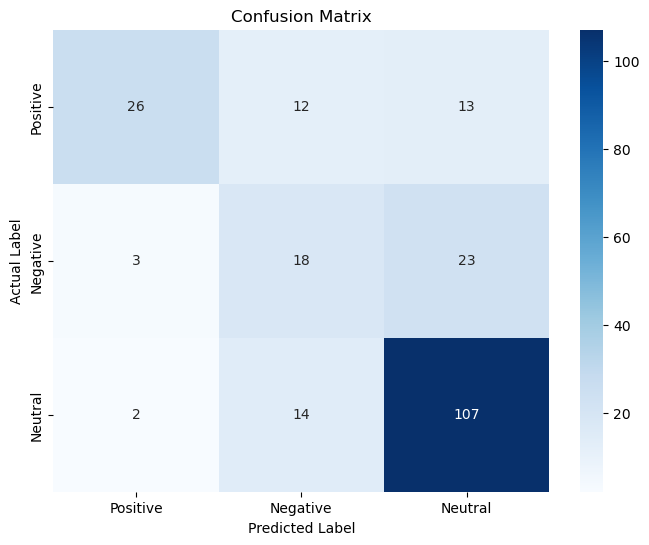

In [105]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_pysentimiento, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix1.png', dpi=300, bbox_inches='tight')

plt.show()

Recall: out of all the sentences that the model predicted, 76% match the test set. F1 shows that the model did a OK job (77%) of predicting the sentiment. Precision - measure how many of the positive predictions made are correct, recall - how many of the positive cases the classifier correctly predicred over all the pos cases - https://www.statology.org/sklearn-classification-report/, https://stephenallwright.com/interpret-f1-score/, https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec


In [106]:
confusion_matrix(sentiment_annotation_list, sentiment_py_list)


array([[ 26,  12,  13],
       [  3,  18,  23],
       [  2,  14, 107]], dtype=int64)

## Corrected lexicon sentiment accuracy

In [107]:
accuracy_score(sentiment_annotation_list,corr_lexicon_sent_score_list)

0.481651376146789

In [108]:
print(classification_report(sentiment_annotation_list, corr_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.37      0.76      0.50        51
           2       0.27      0.32      0.29        44
           3       0.87      0.42      0.57       123

    accuracy                           0.48       218
   macro avg       0.50      0.50      0.45       218
weighted avg       0.63      0.48      0.50       218



In [109]:
import seaborn as sns


In [110]:
lexicon_matrix = confusion_matrix(sentiment_annotation_list, sentiment_py_list)



In [111]:
cm_corrected = confusion_matrix(sentiment_annotation_list, corr_lexicon_sent_score_list)

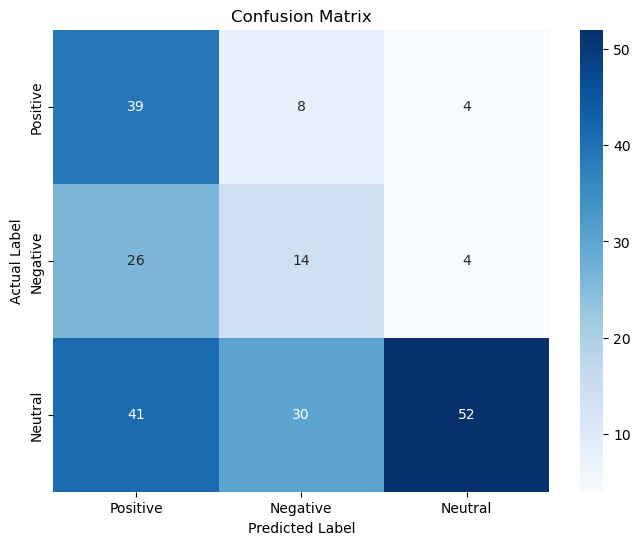

In [112]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix2.png', dpi=300, bbox_inches='tight')

plt.show()

# Manual lexicon sentiment accuracy

In [113]:
accuracy_score(sentiment_annotation_list,manual_lexicon_sent_score_list)

0.47706422018348627

In [114]:
print(classification_report(sentiment_annotation_list, manual_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.37      0.76      0.50        51
           2       0.26      0.32      0.29        44
           3       0.86      0.41      0.56       123

    accuracy                           0.48       218
   macro avg       0.50      0.50      0.45       218
weighted avg       0.63      0.48      0.49       218



In [115]:
confusion_matrix(sentiment_annotation_list, manual_lexicon_sent_score_list)


array([[39,  8,  4],
       [26, 14,  4],
       [41, 31, 51]], dtype=int64)

In [116]:
cm = confusion_matrix(sentiment_annotation_list, manual_lexicon_sent_score_list)


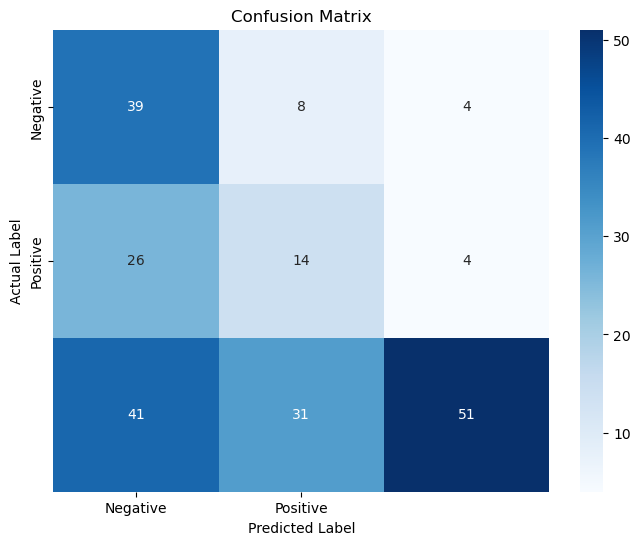

In [117]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Computational lexicon sentiment accuracy

In [118]:
accuracy_score(sentiment_annotation_list,computational_lexicon_sent_score_list)

0.44036697247706424

In [119]:
print(classification_report(sentiment_annotation_list, computational_lexicon_sent_score_list))

              precision    recall  f1-score   support

           1       0.35      0.76      0.48        51
           2       0.25      0.30      0.27        44
           3       0.85      0.36      0.50       123

    accuracy                           0.44       218
   macro avg       0.48      0.47      0.42       218
weighted avg       0.61      0.44      0.45       218



In [120]:
confusion_matrix(sentiment_annotation_list, computational_lexicon_sent_score_list)


array([[39,  8,  4],
       [27, 13,  4],
       [47, 32, 44]], dtype=int64)

# Emotion lexicon evaluation

In [121]:
df['emotion_annotation'] = df['emotion_annotation'].str.strip()


In [122]:
df_emotion = df[df["emotion_annotation"] != 'no_agreement']


In [123]:
df_emotion = df_emotion[df_emotion["emotion_annotation"] != 'anticipation']


In [124]:
df_emotion = df_emotion[df_emotion["emotion_annotation"] != 'trust']


In [125]:
len(df_emotion)

53

In [126]:
df_emotion

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py           GPT
103        G01Q05  Su tierno corazon, su espiritu admirable, su m...                 POS                joy             FP    1761-09-26_El-Duende-especulativo-sobre-la-v...  AnalyzerOutput(output=POS, probas={POS: 0.922,...  AnalyzerOutput(output=joy, probas={joy: 0.936,...                      0.714286                            0.714286                        0.714286             joy                       POS                     POS                     POS          POS        joy           POS
113        G01Q11  Huid, Señora, de éstas, y preferid à su comuni...                 NEG               fear             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.807,...  AnalyzerOutput(output=others, probas={others: ...                     -1.000000                           -1.000000                       -1.000000          others                       NEG                     NEG                     NEG          NEG     others  no_agreement
116        G01Q14  Una muger hermosa, y entendida nos convence ca...                 POS           surprise             SP   1762-1763_El-Pensador_Joseph-Álvarez-y-Vallad...  AnalyzerOutput(output=POS, probas={POS: 0.900,...  AnalyzerOutput(output=joy, probas={joy: 0.493,...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          POS        joy  no_agreement
117        G01Q56  Semejantes documentos, apenas se aprenderán en...                 POS         no emotion              S   1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...  AnalyzerOutput(output=NEG, probas={NEG: 0.670,...  AnalyzerOutput(output=others, probas={others: ...                      0.000000                            0.000000                        0.000000          others                       NEU                     NEU                     NEU          NEG     others  no_agreement
118        G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...                 POS                joy              S   1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...  AnalyzerOutput(output=NEG, probas={NEG: 0.971,...  AnalyzerOutput(output=others, probas={others: ...                     -1.000000                           -1.000000                       -1.000000             joy                       NEG                     NEG                     NEG          NEG     others  no_agreement
119        G01Q15  Esta parte es la mas dificultosa de todo el ex...                 NEU         no emotion              S   1762-1763_El-Pensador_Joseph-Álvarez-y-Vallad...  AnalyzerOutput(output=NEG, probas={NEG: 0.885,...  AnalyzerOutput(output=others, probas={others: ...                      0.000000                            0.000000                        0.000000          others                       NEU                     NEU                     NEU          NEG     others  no_agreement
123        G01Q17  Las quisieron virtuosas, y las tienen virtuosa...                 POS                joy             EX   1763_La-Pensadora-Gaditana_Beatriz-Cienfuegos...  AnalyzerOutput(output=POS, probas={POS: 0.664,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others   

joy - 1
sadness - 2
anger - 3
disgust - 4
surprise - 5
fear - 6 
no_emotion(others) - 7

In [127]:
df_emotion['emotion_annotation_list'] = df_emotion['emotion_annotation'].replace(['joy','sadness','anger','disgust','surprise','fear','no emotion'],['1','2','3','4','5','6','7'])


In [128]:
emotion_annotation_list = df_emotion['emotion_annotation_list'].tolist()
print(emotion_annotation_list)

['1', '6', '5', '7', '1', '7', '1', '7', '5', '5', '1', '3', '7', '1', '1', '3', '7', '7', '7', '7', '7', '3', '2', '1', '7', '1', '3', '2', '7', '7', '7', '7', '7', '3', '2', '2', '2', '7', '7', '7', '7', '1', '7', '2', '7', '2', '1', '2', '7', '7', '7', '7', '7']


In [129]:
df_emotion['emotion_py_list'] = df_emotion['emotion_py'].replace(['joy','sadness','anger','disgust','surprise','fear','others'],['1','2','3','4','5','6','7'])


In [130]:
emotion_py_list = df_emotion['emotion_py_list'].tolist()
print(emotion_py_list)

['1', '7', '1', '7', '7', '7', '7', '6', '2', '7', '1', '3', '7', '1', '7', '2', '7', '7', '7', '7', '7', '3', '7', '1', '1', '7', '3', '7', '3', '7', '7', '7', '7', '3', '2', '3', '3', '3', '3', '3', '3', '7', '7', '2', '7', '2', '7', '7', '7', '7', '3', '2', '7']


In [131]:
df_emotion['emotion_lexicon_list'] = df_emotion['lexicon_emotion'].replace(['joy','sadness','anger','disgust','surprise','fear','others'],['1','2','3','4','5','6','7'])


In [132]:
emotion_lexicon_list = df_emotion['emotion_lexicon_list'].tolist()
print(emotion_lexicon_list)

['1', '7', '7', '7', '1', '7', '1', '7', '7', '7', '1', '7', '7', '1', '7', '6', '1', '1', '1', '7', '1', '1', '2', '1', '7', '7', '3', '6', '7', '7', '1', '1', '7', '7', '2', '2', '1', '3', '1', '1', '1', '3', '1', '1', '7', '1', '7', '7', '7', '2', '2', '3', '1']


# Emotion Lexicon accuracy

In [133]:
accuracy_score(emotion_annotation_list,emotion_lexicon_list)

0.39622641509433965

In [134]:
print(classification_report(emotion_annotation_list,emotion_lexicon_list))

              precision    recall  f1-score   support

           1       0.29      0.60      0.39        10
           2       0.60      0.38      0.46         8
           3       0.25      0.20      0.22         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.52      0.42      0.47        26

    accuracy                           0.40        53
   macro avg       0.28      0.27      0.26        53
weighted avg       0.43      0.40      0.39        53



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pysentimiento emotion accuracy

In [135]:
accuracy_score(emotion_annotation_list,emotion_py_list)

0.5283018867924528

In [136]:
print(classification_report(emotion_annotation_list,emotion_py_list))

              precision    recall  f1-score   support

           1       0.67      0.40      0.50        10
           2       0.50      0.38      0.43         8
           3       0.33      0.80      0.47         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.61      0.65      0.63        26

    accuracy                           0.53        53
   macro avg       0.35      0.37      0.34        53
weighted avg       0.53      0.53      0.51        53



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saving the df

# GPT sentiment accuracy

In [235]:
df_accuracy_gpt = df_sentiment[df_sentiment["GPT"] != 'no_agreement']


KeyError: 'GPT'

In [138]:
df_accuracy_gpt

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py  GPT sentiment_annotation_list sentiment_py_list corr_lexicon_sent_score_list manual_lexicon_sent_score_list computational_lexicon_sent_score_list
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger  NEG                         3                 3                            2                              2                                     2
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others  NEU                         2                 3                            1                              1                                     1
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy  POS                         1                 1                            1                              1                                     1
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others  POS                         1                 1                            1                              1                                     1
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness  NEG                         3                 3                            3                              3                                     1
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(outp

In [139]:
df_accuracy_gpt['GPT'] = df_accuracy_gpt['GPT'].replace(['POS','NEG','NEU'],['1','3','2'])


C:\Users\krusic\AppData\Local\Temp\ipykernel_4224\3167641142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accuracy_gpt['GPT'] = df_accuracy_gpt['GPT'].replace(['POS','NEG','NEU'],['1','3','2'])


In [140]:
accuracy_gpt_list = df_accuracy_gpt['GPT'].tolist()
print(accuracy_gpt_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '2', '3', '3', '2', '3', '3', '3', '3', '2', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '2', '3', '3', '1', '3', '2', '3', '3', '1', '1', '3', '3', '2', '3', '3', '3', '3', '3', '2', '2', '3', '3', '3', '1', '1', '1', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '2', '2', '1', '3', '2', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '1', '3', '2', '2', '1', '1', '3', '2', '2', '3', '2', '1', '2', '3', '2', '2', '2', '2', '2', '2', '2', '3', '2', '3', '3', '1', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '2', '2', '2', '2', '3', '2', '1', '3', '2', '3', '2', '3', '3', '2', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '3', '2', '3', '1', '3', '3', '1', '2']

In [141]:
sentiment_annotation_list_GPT = df_accuracy_gpt['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list_GPT)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2', '3', '2', '3', '2', '3', '3', '1', '3', '3', '3', '3', '2', '3', '1', '3', '3', '3', '3']

In [142]:
accuracy_score(accuracy_gpt_list,sentiment_annotation_list_GPT)

0.83

In [143]:
print(classification_report(accuracy_gpt_list,sentiment_annotation_list_GPT))

              precision    recall  f1-score   support

           1       0.71      0.82      0.76        39
           2       0.78      0.58      0.67        53
           3       0.90      0.95      0.92       108

    accuracy                           0.83       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.83      0.83      0.82       200



In [144]:
cm_gpt = confusion_matrix(accuracy_gpt_list,sentiment_annotation_list_GPT)

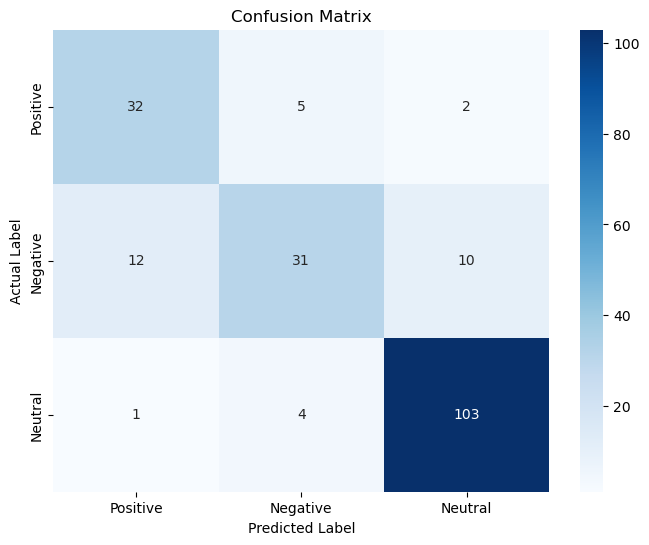

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix3.png', dpi=300, bbox_inches='tight')
plt.show()


# adding new results

In [235]:
df_accuracy_gpt = df_sentiment[df_sentiment["GPT"] != 'no_agreement']


KeyError: 'GPT'

In [213]:
df_accuracy_gpt

NameError: name 'df_accuracy_gpt' is not defined

In [139]:
df_accuracy_gpt['GPT'] = df_accuracy_gpt['GPT'].replace(['POS','NEG','NEU'],['1','3','2'])


C:\Users\krusic\AppData\Local\Temp\ipykernel_4224\3167641142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accuracy_gpt['GPT'] = df_accuracy_gpt['GPT'].replace(['POS','NEG','NEU'],['1','3','2'])


In [140]:
accuracy_gpt_list = df_accuracy_gpt['GPT'].tolist()
print(accuracy_gpt_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '2', '3', '3', '2', '3', '3', '3', '3', '2', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '2', '3', '3', '1', '3', '2', '3', '3', '1', '1', '3', '3', '2', '3', '3', '3', '3', '3', '2', '2', '3', '3', '3', '1', '1', '1', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '2', '2', '1', '3', '2', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '1', '3', '2', '2', '1', '1', '3', '2', '2', '3', '2', '1', '2', '3', '2', '2', '2', '2', '2', '2', '2', '3', '2', '3', '3', '1', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '2', '2', '2', '2', '3', '2', '1', '3', '2', '3', '2', '3', '3', '2', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '3', '2', '3', '1', '3', '3', '1', '2']

In [141]:
sentiment_annotation_list_GPT = df_accuracy_gpt['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list_GPT)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2', '3', '2', '3', '2', '3', '3', '1', '3', '3', '3', '3', '2', '3', '1', '3', '3', '3', '3']

In [142]:
accuracy_score(accuracy_gpt_list,sentiment_annotation_list_GPT)

0.83

In [143]:
print(classification_report(accuracy_gpt_list,sentiment_annotation_list_GPT))

              precision    recall  f1-score   support

           1       0.71      0.82      0.76        39
           2       0.78      0.58      0.67        53
           3       0.90      0.95      0.92       108

    accuracy                           0.83       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.83      0.83      0.82       200



In [144]:
cm_gpt = confusion_matrix(accuracy_gpt_list,sentiment_annotation_list_GPT)

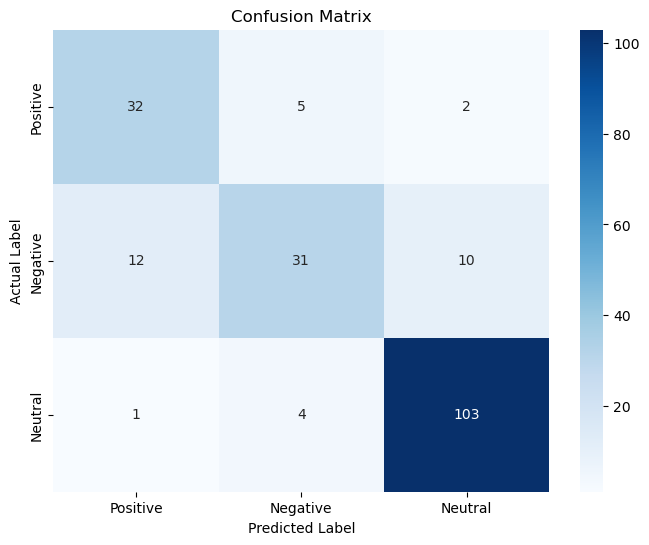

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix3.png', dpi=300, bbox_inches='tight')
plt.show()


# adding new results

In [243]:
df_accuracy_gpt3

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py Sentiment-GPT3-simple sentiment_annotation_list gpt-3-new corr_lexicon_sent_score_list manual_lexicon_sent_score_list computational_lexicon_sent_score_list
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger                   NEG                         3         3                            2                              2                                     2
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others                   NEU                         2         2                            1                              1                                     1
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy                   POS                         1         1                            1                              1                                     1
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others                   POS                         1         1                            1                              1                                     1
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness                   NEG                         3         3                            3                              3                                     1
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pen

In [244]:
df_accuracy_gpt3['gpt-3-new'] = df_accuracy_gpt3['Sentiment-GPT3-simple'].replace(['POS','NEG','NEU'],['1','3','2'])


In [246]:
df_accuracy_gpt3

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py Sentiment-GPT3-simple sentiment_annotation_list gpt-3-new corr_lexicon_sent_score_list manual_lexicon_sent_score_list computational_lexicon_sent_score_list
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger                   NEG                         3         3                            2                              2                                     2
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others                   NEU                         2         2                            1                              1                                     1
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy                   POS                         1         1                            1                              1                                     1
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others                   POS                         1         1                            1                              1                                     1
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness                   NEG                         3         3                            3                              3                                     1
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pen

In [251]:
df_accuracy_gpt3.columns

Index(['question_code', 'sentence', 'polarity_annotation', 'emotion_annotation', 'narrative_form', 'periodical_name', 'sentiment_pysentimiento', 'emotion_pysentimiento', 'nf_sentiment_lexicon_dispecs', 'nf_sentiment_lexicon_computational', 'nf_sentiment_lexicon_corrected', 'lexicon_emotion', 'manual_lexicon_sent_score', 'comp_lexicon_sent_score', 'corr_lexicon_sent_score', 'sentiment_py', 'emotion_py', 'Sentiment-GPT3-simple', 'sentiment_annotation_list', 'gpt-3-new', 'corr_lexicon_sent_score_list', 'manual_lexicon_sent_score_list', 'computational_lexicon_sent_score_list'], dtype='object')

In [253]:
accuracy_gpt_list = df_accuracy_gpt3['gpt-3-new'].tolist()
print(accuracy_gpt_list)

['3', '2', '1', '1', '3', '2', '1', '3', '3', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '1', '3', '1', '2', '3', '3', '1', '2', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '1', '1', '1', '1', '1', '3', '1', '3', '1', '1', '1', '3', '1', '3', '1', '1', '3', '3', '1', '3', '3', '3', '3', '2', '1', '3', '1', '1', '3', '1', '3', '1', '1', '1', '3', '3', '3', '3', '1', '1', '3', '1', '1', '1', '3', '1', '2', '1', '1', '1', '1', '3', '1', '2', '2', '2', '2', '2', '1', '3', '3', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '3', '3', '3', '1', '3', '1', '1', '3', '3', '1', '1', '3', '3', '3', '3', '3', '1', '3', '3', '3', '3', '1', '1', '1', '3', '2', '3', '3', '1', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3',

In [256]:
sentiment_annotation_list_GPT = df_accuracy_gpt3['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list_GPT)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [258]:
accuracy_score(accuracy_gpt_list,sentiment_annotation_list_GPT)

0.7522935779816514

In [259]:
print(classification_report(accuracy_gpt_list,sentiment_annotation_list_GPT))

              precision    recall  f1-score   support

           1       0.94      0.56      0.70        86
           2       0.30      0.93      0.45        14
           3       0.84      0.87      0.85       118

    accuracy                           0.75       218
   macro avg       0.69      0.79      0.67       218
weighted avg       0.84      0.75      0.77       218



In [260]:
cm_gpt = confusion_matrix(accuracy_gpt_list,sentiment_annotation_list_GPT)

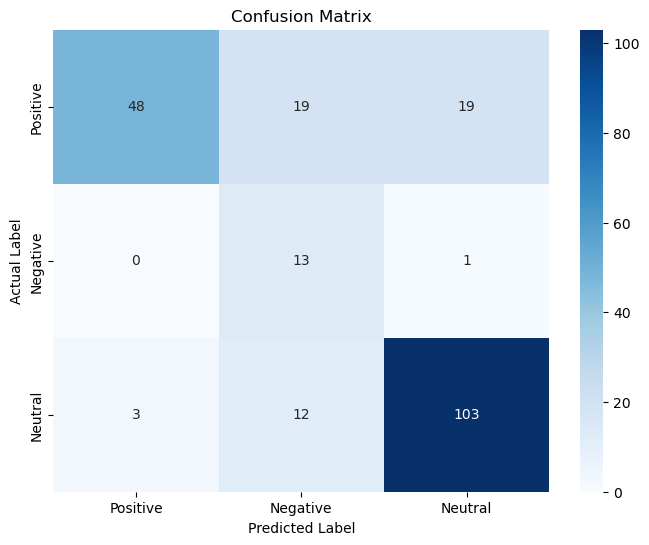

In [261]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix3.png', dpi=300, bbox_inches='tight')
plt.show()


# adding new results

In [129]:
gpt_polarity2 = pd.read_csv('surveys/GPT/gpt3-4.csv', delimiter=';', encoding='utf-8')


In [137]:
gpt_polarity2

index  Column1  Unnamed: 0 question_code                                           sentence polarity_annotation GPT3-advanced GPT3-simple GPT4-simple GPT4-advanced
0        0      0.0         0.0       G00Q136  Miralos sin humanidad, y como esclavos, y ello...                   3           NEG         NEG     unknown           NEG
1        1      1.0         1.0       G00Q138  No es tan facil determinar por dónde se ha de ...                   2           NEU         NEU         NEU           NEU
2        2      2.0         2.0       G00Q139  Tù debes acordarte de la ternura, con que se p...                   1           NEU         POS         POS           POS
3        3      3.0         3.0       G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                   1           NEU         NEU         POS           NEU
4        4      4.0         4.0       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                   3           NEG         NEG     unknown           POS
5        5      5.0         5.0       G00Q142  Algunas veces me contento con arquear las ceja...                   2           NEU         NEG         NEU       unknown
6        6      6.0         6.0       G00Q143  Muriò en mis brazos, y en el desorden, en que ...                   3           POS         POS         NEG           NEG
7        7      7.0         7.0       G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                   3           NEU         NEG     unknown           NEG
8        8      8.0         8.0       G00Q147                         ¿no hay Dios que castigue?                   3           POS         NEG     unknown           POS
9        9      9.0         9.0       G00Q149  Ahora bien, yo no pretendo llevar las cosas al...                   2           NEU         NEU         NEU           POS
10      10     10.0        10.0       G00Q150  Que vivan contentos, y felices todos los hombr...                   1           NEU         POS         POS           POS
11      11     11.0        11.0       G00Q151  Si hablo mucho, si con todos me rio, si me bur...                   3           NEU         NEG     unknown           NEG
12      12     12.0        12.0       G00Q153  Añada Vm. à esto, que tenia una porcion de def...                   3           NEG         NEG     unknown           NEG
13      13     13.0        13.0       G00Q154  Yo sè que su caracter es de amar, y desear lo ...                   2           POS         POS     unknown           POS
14      14     14.0        14.0       G00Q155  Amigo mio, es defecto de historia pensar de es...                   2           NEU         POS         NEU           NEU
15      15     15.0        15.0       G00Q161  Grande es este golpe, no lo niego; pero mayor ...                   3           NEU         NEG     unknown           NEG
16      16     16.0        16.0       G00Q162  Tan flaca, y consumida, que parecía retrato de...                   3           NEG         NEG     unknown           NEG
17      17     17.0        17.0       G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...                   3           NEG         NEG     unknown           NEG
18      18     18.0        18.0       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...                   3           NEG         NEG     unknown           NEG
19      19     19.0        19.0       G00Q165  Pero será dichoso, y feliz en su estado: no po...                   1           NEU         POS         POS       unknown
20      20     20.0        20.0       G00Q166  No està en esto la gracia, sino es que apenas ...                   3           NEG         NEG     unknown           NEG
21      21     21.0        21.0       G00Q167  Qué contento me hallaba, no obstante mi fatali...                   1           POS         POS         POS           POS
22      22     22.0        22.0       G00Q168  porque yo, quando escribo una carta, à excepsi...                   3  

In [131]:
gpt_polarity2.dropna(inplace=True)

In [132]:
gpt_polarity2 = gpt_polarity2.reset_index()

In [133]:
type(gpt_polarity2)

pandas.core.frame.DataFrame

In [134]:
gpt_polarity2.shape

(218, 10)

In [135]:
gpt_polarity2['polarity_annotation'] = gpt_polarity2['polarity_annotation'].replace(['POS','NEG','NEU'],['1','3','2'])

In [136]:
gpt_polarity2['polarity_annotation'] = gpt_polarity2['polarity_annotation'].str.strip()

In [209]:
GPT3_advanced = gpt_polarity2[gpt_polarity2["GPT3-advanced"] != 'unknown']

In [210]:
GPT3_advanced 

index  Column1  Unnamed: 0 question_code                                           sentence polarity_annotation GPT3-advanced GPT3-simple GPT4-simple GPT4-advanced
0        0      0.0         0.0       G00Q136  Miralos sin humanidad, y como esclavos, y ello...                   3           NEG         NEG     unknown           NEG
1        1      1.0         1.0       G00Q138  No es tan facil determinar por dónde se ha de ...                   2           NEU         NEU         NEU           NEU
2        2      2.0         2.0       G00Q139  Tù debes acordarte de la ternura, con que se p...                   1           NEU         POS         POS           POS
3        3      3.0         3.0       G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                   1           NEU         NEU         POS           NEU
4        4      4.0         4.0       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                   3           NEG         NEG     unknown           POS
5        5      5.0         5.0       G00Q142  Algunas veces me contento con arquear las ceja...                   2           NEU         NEG         NEU       unknown
6        6      6.0         6.0       G00Q143  Muriò en mis brazos, y en el desorden, en que ...                   3           POS         POS         NEG           NEG
7        7      7.0         7.0       G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                   3           NEU         NEG     unknown           NEG
8        8      8.0         8.0       G00Q147                         ¿no hay Dios que castigue?                   3           POS         NEG     unknown           POS
9        9      9.0         9.0       G00Q149  Ahora bien, yo no pretendo llevar las cosas al...                   2           NEU         NEU         NEU           POS
10      10     10.0        10.0       G00Q150  Que vivan contentos, y felices todos los hombr...                   1           NEU         POS         POS           POS
11      11     11.0        11.0       G00Q151  Si hablo mucho, si con todos me rio, si me bur...                   3           NEU         NEG     unknown           NEG
12      12     12.0        12.0       G00Q153  Añada Vm. à esto, que tenia una porcion de def...                   3           NEG         NEG     unknown           NEG
13      13     13.0        13.0       G00Q154  Yo sè que su caracter es de amar, y desear lo ...                   2           POS         POS     unknown           POS
14      14     14.0        14.0       G00Q155  Amigo mio, es defecto de historia pensar de es...                   2           NEU         POS         NEU           NEU
15      15     15.0        15.0       G00Q161  Grande es este golpe, no lo niego; pero mayor ...                   3           NEU         NEG     unknown           NEG
16      16     16.0        16.0       G00Q162  Tan flaca, y consumida, que parecía retrato de...                   3           NEG         NEG     unknown           NEG
17      17     17.0        17.0       G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...                   3           NEG         NEG     unknown           NEG
18      18     18.0        18.0       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...                   3           NEG         NEG     unknown           NEG
19      19     19.0        19.0       G00Q165  Pero será dichoso, y feliz en su estado: no po...                   1           NEU         POS         POS       unknown
20      20     20.0        20.0       G00Q166  No està en esto la gracia, sino es que apenas ...                   3           NEG         NEG     unknown           NEG
21      21     21.0        21.0       G00Q167  Qué contento me hallaba, no obstante mi fatali...                   1           POS         POS         POS           POS
22      22     22.0        22.0       G00Q168  porque yo, quando escribo una carta, à excepsi...                   3  

In [211]:
GPT3_advanced = GPT3_advanced.reset_index()

In [212]:
GPT3_advanced.shape

(215, 11)

In [159]:
GPT3_advanced['GPT3-advanced'] = GPT3_advanced ['GPT3-advanced'].replace(['POS','NEG','NEU'],['1','3','2'])

C:\Users\krusic\AppData\Local\Temp\ipykernel_16980\2019621505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPT3_advanced['GPT3-advanced'] = GPT3_advanced ['GPT3-advanced'].replace(['POS','NEG','NEU'],['1','3','2'])


In [160]:
GPT3_advanced_list = GPT3_advanced['GPT3-advanced'].tolist()
print(GPT3_advanced_list)

['3', '2', '2', '2', '3', '2', '1', '2', '1', '2', '2', '2', '3', '1', '2', '2', '3', '3', '3', '2', '3', '1', '2', '3', '2', '1', '3', '2', '2', '3', '2', '3', '2', '3', '2', '3', '2', '1', '2', '1', '2', '2', '1', '1', '3', '3', '1', '2', '3', '3', '3', '2', '3', '2', '2', '2', '2', '3', '2', '3', '1', '2', '3', '2', '2', '2', '3', '2', '3', '1', '3', '3', '2', '2', '3', '3', '3', '2', '1', '1', '1', '2', '1', '2', '3', '2', '2', '1', '1', '2', '3', '2', '2', '2', '2', '2', '2', '2', '3', '1', '2', '2', '3', '1', '3', '2', '2', '2', '2', '2', '2', '1', '3', '1', '2', '2', '2', '1', '1', '2', '2', '3', '2', '1', '2', '1', '1', '1', '3', '2', '1', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '2', '2', '1', '2', '2', '1', '2', '2', '1', '1', '1', '3', '2', '3', '2', '2', '2', '2', '1', '1', '3', '3', '1', '3', '2', '2', '3', '2', '2', '3', '3', '2', '1', '3', '1', '1', '2', '3', '3', '3', '3', '3', '1', '2', '2', '3', '2', '1', '2', '2', '2', '3', '1', '2', '2',

In [161]:
polarity_annotation_list = GPT3_advanced['polarity_annotation'].tolist()
print(polarity_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2', '3', '2',

In [152]:
accuracy_score(GPT3_advanced_list,polarity_annotation_list)

0.4604651162790698

In [153]:
print(classification_report(GPT3_advanced_list,polarity_annotation_list))

              precision    recall  f1-score   support

           1       0.43      0.49      0.46        45
           2       0.57      0.23      0.33       109
           3       0.43      0.85      0.57        61

    accuracy                           0.46       215
   macro avg       0.48      0.52      0.45       215
weighted avg       0.50      0.46      0.42       215



In [155]:
cm_gpt3_adv = confusion_matrix(GPT3_advanced_list,polarity_annotation_list)

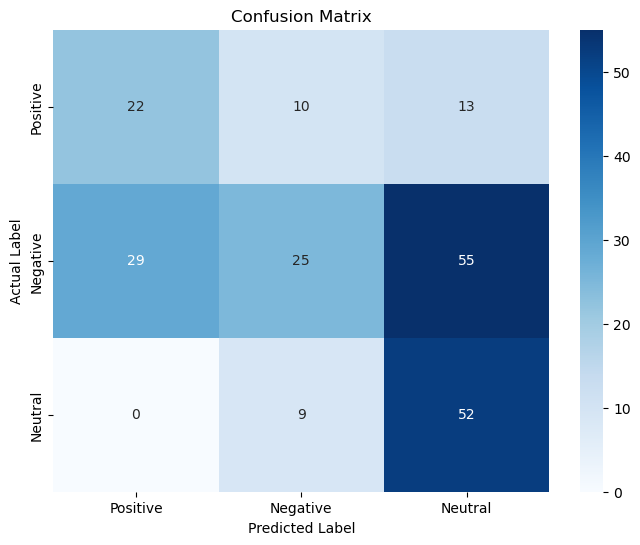

In [156]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt3_adv, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()


In [163]:
GPT4_advanced = gpt_polarity2[gpt_polarity2["GPT4-advanced"] != 'unknown']

In [164]:
GPT4_advanced.reset_index() 

index  Column1  Unnamed: 0 question_code                                           sentence polarity_annotation GPT3-advanced GPT3-simple GPT4-simple GPT4-advanced
0        0      0.0         0.0       G00Q136  Miralos sin humanidad, y como esclavos, y ello...                   3           NEG         NEG     unknown           NEG
1        1      1.0         1.0       G00Q138  No es tan facil determinar por dónde se ha de ...                   2           NEU         NEU         NEU           NEU
2        2      2.0         2.0       G00Q139  Tù debes acordarte de la ternura, con que se p...                   1           NEU         POS         POS           POS
3        3      3.0         3.0       G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                   1           NEU         NEU         POS           NEU
4        4      4.0         4.0       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                   3           NEG         NEG     unknown           POS
6        6      6.0         6.0       G00Q143  Muriò en mis brazos, y en el desorden, en que ...                   3           POS         POS         NEG           NEG
7        7      7.0         7.0       G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                   3           NEU         NEG     unknown           NEG
8        8      8.0         8.0       G00Q147                         ¿no hay Dios que castigue?                   3           POS         NEG     unknown           POS
9        9      9.0         9.0       G00Q149  Ahora bien, yo no pretendo llevar las cosas al...                   2           NEU         NEU         NEU           POS
10      10     10.0        10.0       G00Q150  Que vivan contentos, y felices todos los hombr...                   1           NEU         POS         POS           POS
11      11     11.0        11.0       G00Q151  Si hablo mucho, si con todos me rio, si me bur...                   3           NEU         NEG     unknown           NEG
12      12     12.0        12.0       G00Q153  Añada Vm. à esto, que tenia una porcion de def...                   3           NEG         NEG     unknown           NEG
13      13     13.0        13.0       G00Q154  Yo sè que su caracter es de amar, y desear lo ...                   2           POS         POS     unknown           POS
14      14     14.0        14.0       G00Q155  Amigo mio, es defecto de historia pensar de es...                   2           NEU         POS         NEU           NEU
15      15     15.0        15.0       G00Q161  Grande es este golpe, no lo niego; pero mayor ...                   3           NEU         NEG     unknown           NEG
16      16     16.0        16.0       G00Q162  Tan flaca, y consumida, que parecía retrato de...                   3           NEG         NEG     unknown           NEG
17      17     17.0        17.0       G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...                   3           NEG         NEG     unknown           NEG
18      18     18.0        18.0       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...                   3           NEG         NEG     unknown           NEG
20      20     20.0        20.0       G00Q166  No està en esto la gracia, sino es que apenas ...                   3           NEG         NEG     unknown           NEG
21      21     21.0        21.0       G00Q167  Qué contento me hallaba, no obstante mi fatali...                   1           POS         POS         POS           POS
22      22     22.0        22.0       G00Q168  porque yo, quando escribo una carta, à excepsi...                   3           NEU         NEG         NEG           NEG
23      23     23.0        23.0       G00Q171  ¡valgate Dios por nombre, que aún assi engendr...                   3           NEG         NEG     unknown           NEG
24      24     24.0        24.0       G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...                   1  

In [165]:
GPT4_advanced['GPT4-advanced'] = GPT4_advanced ['GPT4-advanced'].replace(['POS','NEG','NEU'],['1','3','2'])

C:\Users\krusic\AppData\Local\Temp\ipykernel_16980\415226162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPT4_advanced['GPT4-advanced'] = GPT4_advanced ['GPT4-advanced'].replace(['POS','NEG','NEU'],['1','3','2'])


In [166]:
GPT4_advanced_list = GPT4_advanced['GPT4-advanced'].tolist()
print(GPT4_advanced_list)

['3', '2', '1', '2', '1', '3', '3', '1', '1', '1', '3', '3', '1', '2', '3', '3', '3', '3', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '1', '3', '1', '3', '2', '3', '3', '1', '1', '3', '3', '2', '3', '1', '3', '3', '3', '2', '1', '3', '3', '3', '1', '1', '2', '3', '3', '3', '3', '1', '2', '1', '2', '3', '1', '3', '1', '3', '2', '3', '1', '3', '1', '2', '3', '3', '1', '3', '3', '1', '3', '3', '3', '1', '2', '3', '2', '3', '1', '1', '2', '3', '3', '3', '1', '1', '2', '2', '1', '1', '1', '2', '1', '3', '1', '1', '2', '3', '1', '2', '2', '2', '2', '2', '2', '3', '1', '3', '2', '1', '3', '3', '3', '1', '3', '3', '2', '1', '3', '3', '2', '2', '3', '1', '3', '2', '1', '3', '2', '3', '3', '3', '3', '1', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '3', '2', '1', '3', '2', '3', '3', '3', '3', '2', '3', '2', '2', '1', '1',

In [167]:
polarity_annotation_list = GPT4_advanced['polarity_annotation'].tolist()
print(polarity_annotation_list)

['3', '2', '1', '1', '3', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '1', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2', '3', '2', '3', '2', '3', '3', '1',

In [168]:
accuracy_score(GPT4_advanced_list,polarity_annotation_list)

0.7440758293838863

In [169]:
print(classification_report(GPT4_advanced_list,polarity_annotation_list))

              precision    recall  f1-score   support

           1       0.73      0.60      0.66        58
           2       0.50      0.55      0.53        38
           3       0.83      0.88      0.86       115

    accuracy                           0.74       211
   macro avg       0.69      0.68      0.68       211
weighted avg       0.75      0.74      0.74       211



In [170]:
cm_gpt4_adv = confusion_matrix(GPT4_advanced_list,polarity_annotation_list)

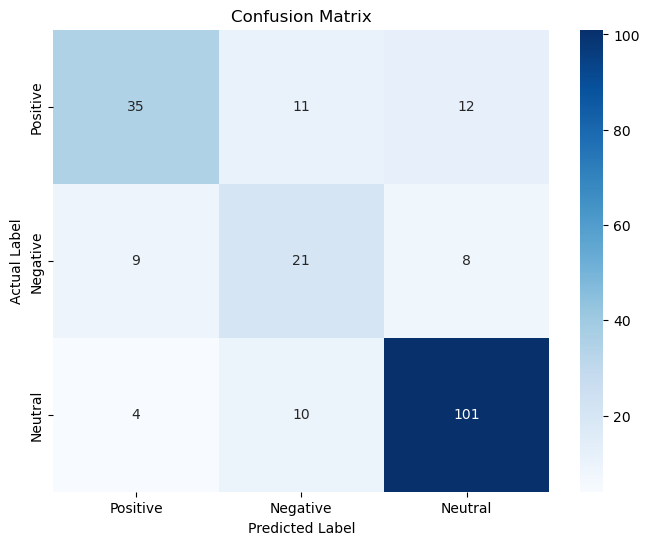

In [171]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt4_adv, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()


In [175]:
GPT4_simple = gpt_polarity2[gpt_polarity2["GPT4-simple"] != 'unknown']

In [202]:
GPT4_simple = GPT4_simple.reset_index()

In [203]:
GPT4_simple.shape

(124, 11)

In [204]:
GPT4_simple['GPT4-simple'] = GPT4_simple['GPT4-simple'].replace(['POS','NEG','NEU'],['1','3','2'])

In [205]:
GPT4_simple_list = GPT4_simple['GPT4-simple'].tolist()
print(GPT4_simple_list)

['2', '1', '1', '2', '3', '2', '1', '2', '1', '1', '3', '1', '1', '3', '3', '1', '1', '1', '3', '2', '3', '2', '2', '1', '1', '3', '1', '3', '3', '2', '2', '1', '1', '1', '2', '3', '1', '1', '1', '1', '1', '2', '1', '2', '3', '3', '1', '3', '1', '2', '3', '1', '3', '2', '2', '1', '3', '1', '2', '2', '2', '1', '2', '2', '2', '3', '1', '1', '1', '1', '1', '2', '2', '2', '1', '1', '1', '2', '2', '2', '2', '2', '2', '3', '1', '3', '2', '1', '3', '3', '1', '2', '2', '2', '2', '3', '1', '3', '1', '2', '1', '1', '1', '1', '2', '3', '3', '2', '3', '1', '1', '1', '3', '2', '2', '2', '1', '1', '3', '3', '3', '1', '2', '1']


In [206]:
polarity_annotation_list = GPT4_simple['polarity_annotation'].tolist()
print(polarity_annotation_list)

['2', '1', '1', '2', '3', '2', '1', '2', '1', '1', '3', '1', '1', '3', '3', '1', '1', '1', '3', '1', '3', '3', '2', '1', '1', '3', '1', '3', '1', '2', '2', '1', '1', '2', '3', '2', '1', '1', '1', '1', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '2', '1', '3', '3', '3', '2', '3', '1', '3', '2', '1', '1', '1', '1', '2', '3', '1', '2', '3', '2', '1', '1', '2', '3', '1', '1', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '1', '1', '3', '1', '1', '3', '2', '2', '2', '2', '1', '2', '2', '1', '3', '2', '2', '1', '3', '3', '3', '2', '3', '2', '1', '1', '3', '2', '2', '3', '1', '3', '3', '3', '2', '1', '3', '3']


In [207]:
accuracy_score(GPT4_simple_list,polarity_annotation_list)

0.6693548387096774

In [208]:
print(classification_report(GPT4_simple_list,polarity_annotation_list))

              precision    recall  f1-score   support

           1       0.81      0.73      0.77        52
           2       0.61      0.55      0.57        42
           3       0.56      0.73      0.64        30

    accuracy                           0.67       124
   macro avg       0.66      0.67      0.66       124
weighted avg       0.68      0.67      0.67       124



In [184]:
cm_gpt4_simple = confusion_matrix(GPT4_simple_list,polarity_annotation_list)

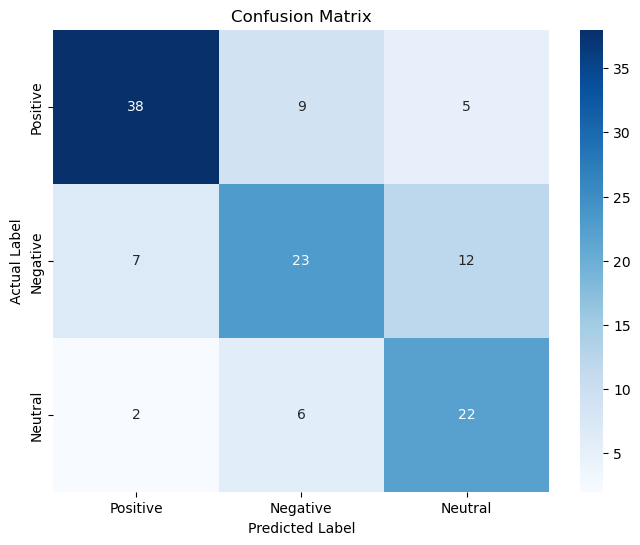

In [185]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt4_simple, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()


In [186]:
GPT3_simple = gpt_polarity2[gpt_polarity2["GPT3-simple"] != 'unknown']

In [197]:
GPT3_simple = GPT3_simple.reset_index()

In [198]:
GPT3_simple.shape

(218, 11)

In [199]:
GPT3_simple['GPT3-simple'] = GPT3_simple['GPT3-simple'].replace(['POS','NEG','NEU'],['1','3','2'])

In [200]:
GPT3_simple_list = GPT3_simple['GPT3-simple'].tolist()
print(GPT3_simple_list)

['3', '2', '1', '2', '3', '3', '1', '3', '3', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '1', '3', '3', '1', '1', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '1', '3', '2', '2', '3', '3', '1', '1', '3', '3', '3', '1', '1', '1', '3', '1', '3', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '1', '1', '3', '1', '3', '1', '1', '3', '3', '1', '3', '3', '3', '3', '1', '1', '3', '1', '1', '3', '1', '3', '1', '1', '1', '3', '3', '3', '3', '1', '1', '2', '1', '1', '1', '3', '1', '2', '1', '1', '1', '1', '3', '1', '1', '2', '1', '2', '2', '3', '3', '3', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '3', '3', '3', '1', '3', '2', '3', '3', '1', '1', '3', '3', '3', '1', '3', '1', '1', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3',

In [201]:
len(GPT3_simple_list)

218

In [190]:
polarity_annotation_list = GPT3_simple['polarity_annotation'].tolist()
print(polarity_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [191]:
accuracy_score(GPT3_simple_list,polarity_annotation_list)

0.7385321100917431

In [192]:
print(classification_report(GPT3_simple_list,polarity_annotation_list))

              precision    recall  f1-score   support

           1       0.94      0.56      0.70        86
           2       0.27      0.86      0.41        14
           3       0.82      0.86      0.84       118

    accuracy                           0.74       218
   macro avg       0.68      0.76      0.65       218
weighted avg       0.83      0.74      0.76       218



In [193]:
cm_gpt3_simple = confusion_matrix(GPT3_simple_list,polarity_annotation_list)

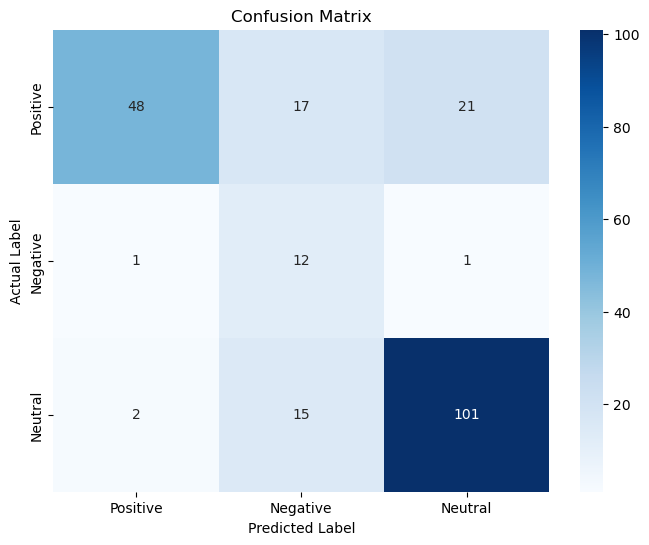

In [194]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt3_simple, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()
